In [1]:
import pandas as pd

In [2]:
# load the data
df = pd.read_csv("regressiondata-221101-214107.csv",index_col='ID')

In [3]:
# Display the first five rows of the data
df.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963


In [4]:
df.tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,2021.10,6.0,87.260667,9.0,5614.0,681072
9355,2020.12,20.0,584.007146,4.0,5614.0,403096


In [5]:
df.iloc[9354:9355,0:2]

,TransactionDate,HouseAge
ID,,
9354,2021.1,6.0


### 2. Split Data to prevent Snooping Bias

In [6]:
# import splitting function
from sklearn.model_selection import train_test_split

In [7]:
# Spplit data into training and testing
train,test = train_test_split(df,test_size=0.3,random_state=1234)

In [8]:
# See the train parition
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,2019.03,34.0,124.082230,8.0,5212.0,250495


### 3. Exploratory Data Analysis

####     Bird Eye View

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6549 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6548 non-null   float64
 1   HouseAge           6546 non-null   float64
 2   DistanceToStation  6547 non-null   float64
 3   NumberOfPubs       6547 non-null   float64
 4   PostCode           6547 non-null   float64
 5   HousePrice         6544 non-null   object 
dtypes: float64(5), object(1)
memory usage: 358.1+ KB


In [10]:
# Create Summary stat

train.describe()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [11]:
# Type Casting 
train['PostCode'] = train['PostCode'].astype(str)
train['TransactionDate'] = train['TransactionDate'].astype(str)

In [12]:
#train['HousePrice'] = train['HousePrice'].astype(float)

In [13]:
# Create Summay stattics for non numric features
train.describe(include='object')

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


### Analyse Numerical Attributes

#### Plot Distribution

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

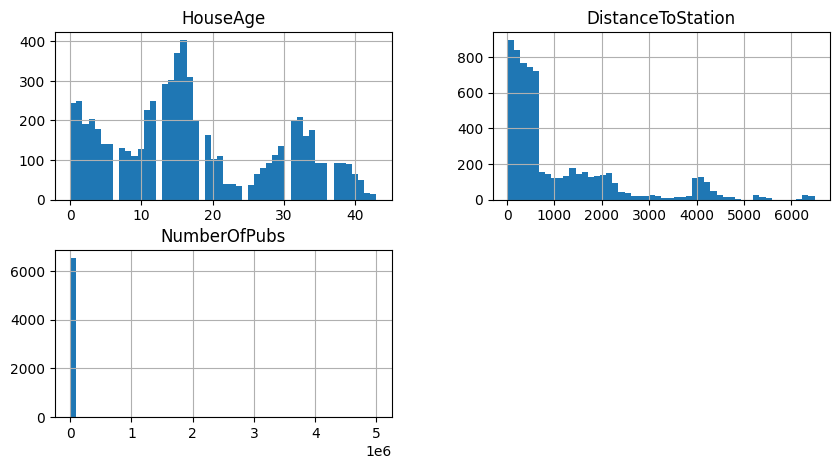

In [15]:
train.hist(figsize=(10,5),bins=50)
plt.show()

In [16]:
train['HousePrice'] = train['HousePrice'].astype(float) 

ValueError: could not convert string to float: '??'

In [17]:
# Filter  dataset based on houseprice == '??'
train[train['HousePrice'] == '??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [18]:
train = train[train['HousePrice'] != '??']

In [19]:
# Double check if row has been droped
train[train['HousePrice'] == '??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [20]:
# overwrite the house price 
train['HousePrice'] = train['HousePrice'].astype(float) 

In [21]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

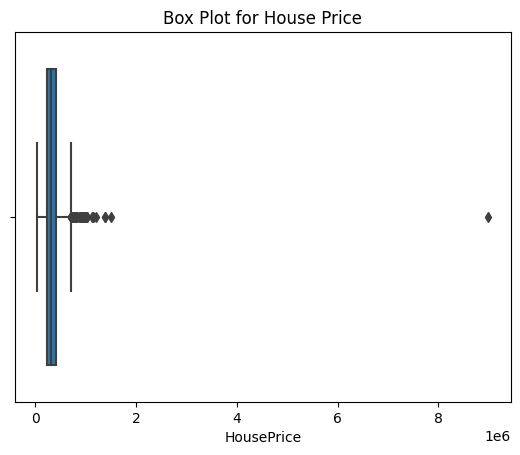

In [22]:
# Create a box plot for house prices 
plt.title('Box Plot for House Price')
sns.boxplot(x=train['HousePrice'])
plt.show()

#### Drop outlier

In [23]:
# Find the outlier
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [24]:
train = train.drop(8445)

In [25]:
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5091,2020.05,10.0,295.072723,1.0,5614.0,1151940.0
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [26]:
train.sort_values('NumberOfPubs').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5334,2021.07,33.0,130.200701,10.0,5212.0,326772.0
4738,2021.11,34.0,42.324197,10.0,5614.0,518639.0
1046,2020.01,23.0,568.984852,10.0,5213.0,312165.0
6257,2019.01,34.0,98.166618,10.0,5222.0,489487.0
2916,2021.06,8.0,656.962289,10.0,5217.0,511688.0
422,2019.1,32.0,164.514773,10.0,5614.0,346126.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0


In [27]:
train.drop(13,inplace=True)

In [28]:
train.sort_values('NumberOfPubs').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5334,2021.07,33.0,130.200701,10.0,5212.0,326772.0
4738,2021.11,34.0,42.324197,10.0,5614.0,518639.0
1046,2020.01,23.0,568.984852,10.0,5213.0,312165.0
6257,2019.01,34.0,98.166618,10.0,5222.0,489487.0
2916,2021.06,8.0,656.962289,10.0,5217.0,511688.0
3195,2020.11,32.0,324.371247,10.0,5614.0,488918.0
2996,2020.03,28.0,772.777219,10.0,5217.0,299235.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0


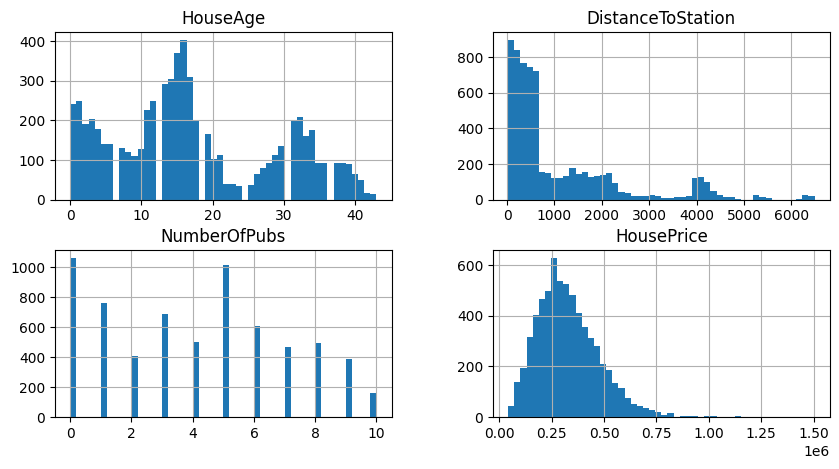

In [29]:
train.hist(figsize=(10,5),bins=50)
plt.show()

### analysing Categorial Feature

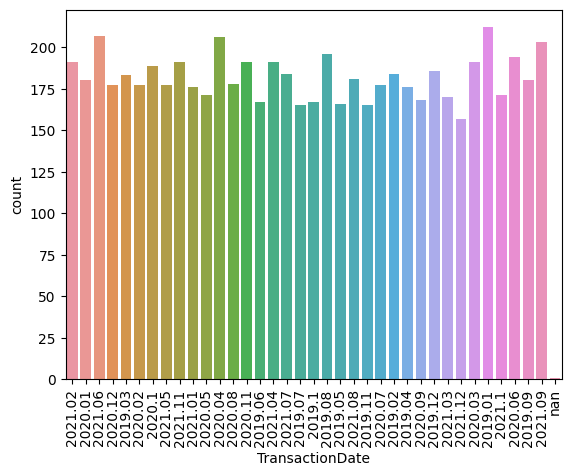

In [30]:
plt.xticks(rotation=90)
sns.countplot(x='TransactionDate',data=train)
plt.show()


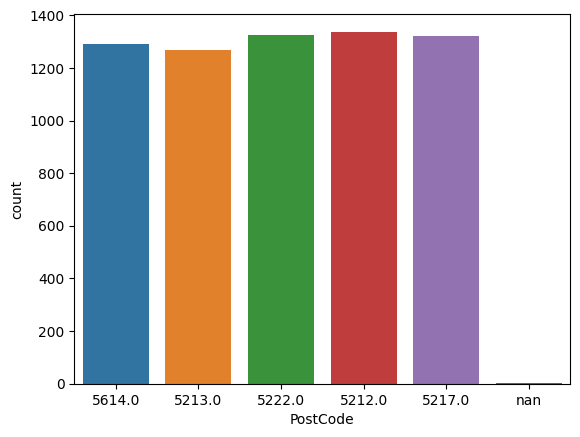

In [31]:
#plt.xticks(rotation=90)
sns.countplot(x=train['PostCode'])
plt.show()


### Analyse Reletionships Numeric/Numeric

#### Calculate Pearson's Correlation

In [32]:
# Calculate perasons correleation
train.select_dtypes(exclude='object').corr()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice
HouseAge,1.000000,0.034074,0.044189,-0.156693
DistanceToStation,0.034074,1.000000,-0.586704,-0.539859
NumberOfPubs,0.044189,-0.586704,1.000000,0.452309
HousePrice,-0.156693,-0.539859,0.452309,1.000000


<Axes: >

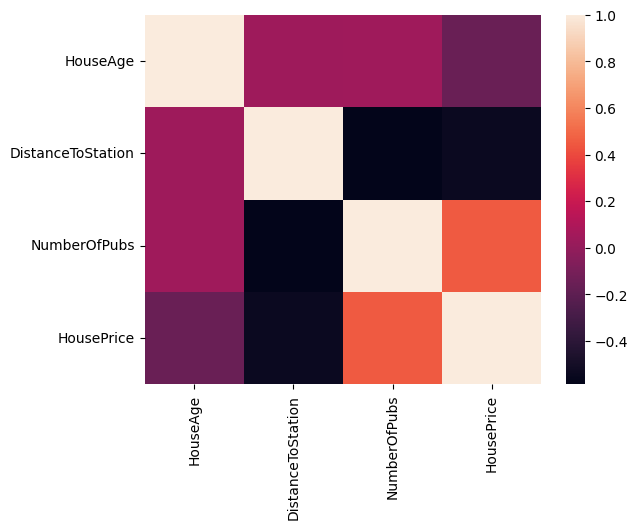

In [33]:
sns.heatmap(train.select_dtypes(exclude='object').corr())

<Axes: xlabel='DistanceToStation', ylabel='HousePrice'>

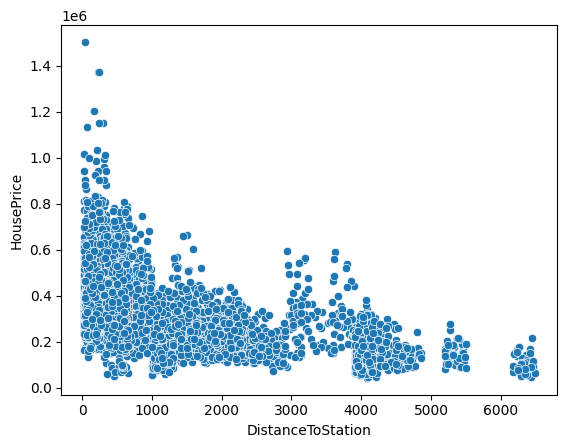

In [34]:
# created Scatter plot
sns.scatterplot(x='DistanceToStation',y='HousePrice',data=train)

<Axes: xlabel='NumberOfPubs', ylabel='HousePrice'>

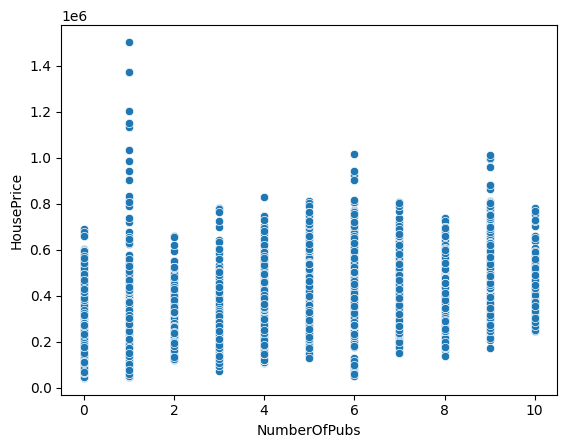

In [35]:
# created Scatter plot
sns.scatterplot(x='NumberOfPubs',y='HousePrice',data=train)

<Axes: xlabel='HouseAge', ylabel='HousePrice'>

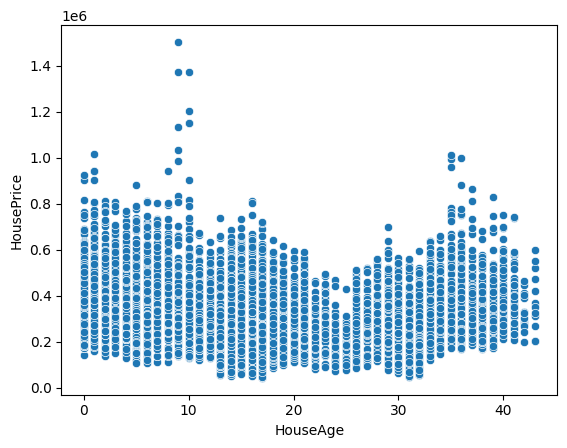

In [36]:
sns.scatterplot(x='HouseAge',y='HousePrice',data=train)

### Analyse Relestionships Cat/Num


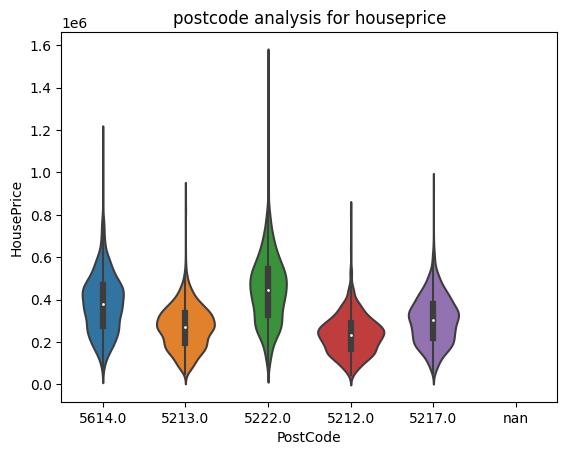

In [37]:
plt.title('postcode analysis for houseprice')
sns.violinplot(x='PostCode',y='HousePrice',data=train)
plt.show()

#### What about date

In [38]:
# check for null in a coulm
train[train['TransactionDate'].isnull()]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [39]:
train[train['TransactionDate']=='nan']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
7673,nan,NaN,3830.892098,0.0,5217.0,NaN


In [40]:
# Drop missing house prices 
train = train[~train['HousePrice'].isnull()]

In [41]:
# Apply string transformation on trasnction date 
train['YearSold'] = train['TransactionDate'].apply(lambda X:X[:4]).astype(int)
train['MonthSold'] = train['TransactionDate'].apply(lambda X:X[5:]).astype(int)

In [42]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
YearSold               int32
MonthSold              int32
dtype: object

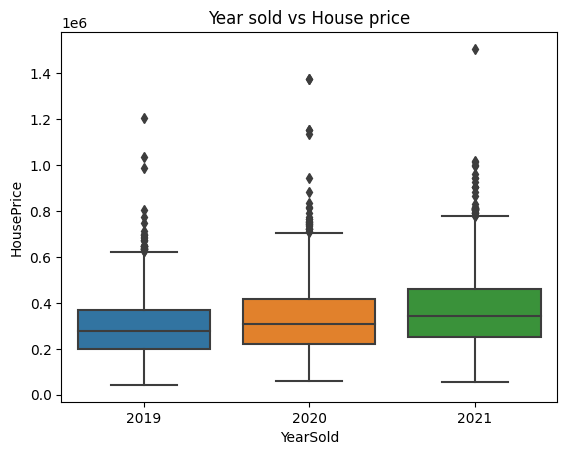

In [43]:
plt.title('Year sold vs House price')
sns.boxplot(x='YearSold',y='HousePrice',data=train)
plt.show()


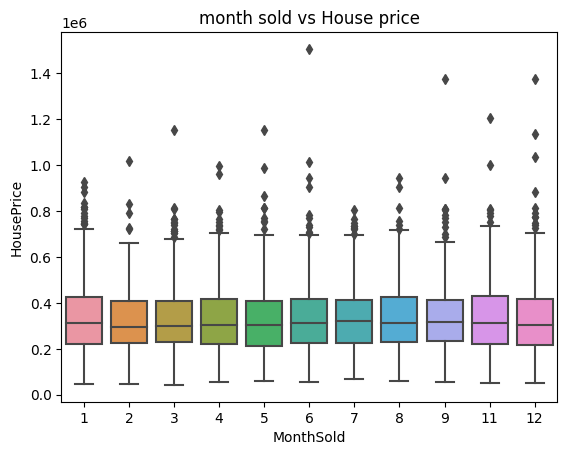

In [44]:
plt.title('month sold vs House price')
sns.boxplot(x='MonthSold',y='HousePrice',data=train)
plt.show()

### 4. Data Preprocessing

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin

In [79]:
class Preprocessor(BaseEstimator,TransformerMixin):
    # Train our custom preprocessors
    def fit(self,X,y=None):
        self.imputer = SimpleImputer()
        self.imputer.fit(X[['HouseAge','DistanceToStation','NumberOfPubs']])

        self.scaler = StandardScaler()
        self.scaler.fit(X[['HouseAge','DistanceToStation','NumberOfPubs']])

        self.onehot = OneHotEncoder(handle_unknown = 'ignore')
        self.onehot.fit(X[['PostCode']])

        return self

    
    # Apply our custom preprocessors 
    def transform(self,X):
        #Apply Simple imputer
        imputed_cols=self.imputer.transform(train[['HouseAge','DistanceToStation','NumberOfPubs']])
        onehot_cols = self.onehot.transform(X[['PostCode']])

        # Copy the df
        transformed_df = X.copy()
        transformed_df['Year'] = transformed_df['TransactionDate'].apply(lambda X:X[:4]).astype(int)
        transformed_df['Month'] = transformed_df['TransactionDate'].apply(lambda X:X[5:]).astype(int)
        transformed_df = transformed_df.drop('TransactionDate',axis=1)
        
        # Apply transformed columns 
        transformed_df[['HouseAge','DistanceToStation','NumberOfPubs']] = imputed_cols
        transformed_df[['HouseAge','DistanceToStation','NumberOfPubs']] =  self.scaler.transform(transformed_df[['HouseAge','DistanceToStation','NumberOfPubs']])
        transformed_df = transformed_df.drop('PostCode',axis=1)
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        print(transformed_df.shape)
        return transformed_df

In [78]:
# class Preprocessor(BaseEstimator, TransformerMixin): 
#     # Train our custom preprocessors 
#     def fit(self, X, y=None): 
        
#         # Create and fit simple imputer
#         self.imputer = SimpleImputer()
#         self.imputer.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
#         # Create and fit Standard Scaler 
#         self.scaler = StandardScaler()
#         self.scaler.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']]) 
        
#         # Create and fit one hot encoder
#         self.onehot = OneHotEncoder(handle_unknown='ignore')
#         self.onehot.fit(X[['PostCode']])
        
#         return self 
        
        
#     # Apply our custom preprocessors 
#     def transform(self, X): 
        
#         # Apply simple imputer 
#         imputed_cols = self.imputer.transform(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
#         onehot_cols = self.onehot.transform(X[['PostCode']])
        
#         # Copy the df 
#         transformed_df = X.copy()
        
#         # Apply year and month transforms 
#         transformed_df['Year'] = transformed_df['TransactionDate'].apply(lambda x: x[:4]).astype(int)
#         transformed_df['Month'] = transformed_df['TransactionDate'].apply(lambda x: x[5:]).astype(int)
#         transformed_df = transformed_df.drop('TransactionDate', axis=1)
        
#         # Apply transformed columns
#         transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = imputed_cols
#         transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = self.scaler.transform(transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        
#         # Drop existing Post Code column and replace with one hot equiv
#         transformed_df = transformed_df.drop('PostCode', axis=1) 
#         transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
#         return transformed_df

In [48]:
preproc = Preprocessor()
preproc.fit(train)
preprocessed_df = preproc.transform(train.drop(['YearSold','MonthSold'],axis=1))

In [49]:
preprocessed_df.head()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,Year,Month,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0
ID,,,,,,,,,,,
8450,1.449005,-0.496716,1.328375,460286.0,2021,2,0,0,0,0,1
5758,-0.033105,-0.375573,-0.363196,253332.0,2020,1,0,1,0,0,0
4030,1.449005,-0.634586,1.666689,486532.0,2021,6,0,0,0,0,1
8447,-1.515216,-0.705984,0.651746,595168.0,2020,12,0,0,0,1,0
4370,1.449005,-0.761991,1.328375,250495.0,2019,3,1,0,0,0,0


In [50]:
preprocessed_df.shape

(6541, 11)

In [51]:
preprocessed_df.dtypes

HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
HousePrice           float64
Year                   int32
Month                  int32
PostCode_5212.0        int32
PostCode_5213.0        int32
PostCode_5217.0        int32
PostCode_5222.0        int32
PostCode_5614.0        int32
dtype: object

In [52]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6541 entries, 8450 to 8915
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HouseAge           6541 non-null   float64
 1   DistanceToStation  6541 non-null   float64
 2   NumberOfPubs       6541 non-null   float64
 3   HousePrice         6541 non-null   float64
 4   Year               6541 non-null   int32  
 5   Month              6541 non-null   int32  
 6   PostCode_5212.0    6541 non-null   int32  
 7   PostCode_5213.0    6541 non-null   int32  
 8   PostCode_5217.0    6541 non-null   int32  
 9   PostCode_5222.0    6541 non-null   int32  
 10  PostCode_5614.0    6541 non-null   int32  
dtypes: float64(4), int32(7)
memory usage: 434.4 KB


In [53]:
train.columns

Index(['TransactionDate', 'HouseAge', 'DistanceToStation', 'NumberOfPubs',
       'PostCode', 'HousePrice', 'YearSold', 'MonthSold'],
      dtype='object')

### Clean up Analysis Feature

In [54]:
train.drop(['YearSold', 'MonthSold'],axis=1,inplace=True)

In [55]:
X_train = train.drop('HousePrice',axis=1)
y_train = train['HousePrice']

### 5. Modelling

#### import ML Dependencies

In [56]:
from sklearn.pipeline import make_pipeline 

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

#### Create Piplelines

In [58]:
pipelines = {
    'ridge': make_pipeline(Preprocessor(), Ridge()), 
    'rf': make_pipeline(Preprocessor(), RandomForestRegressor()), 
    'gb': make_pipeline(Preprocessor(), GradientBoostingRegressor()), 
    'xg': make_pipeline(Preprocessor(), XGBRegressor()), 
}

#### Create Tuning Grids

In [59]:
pipelines['ridge'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()), ('ridge', Ridge())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'ridge': Ridge(),
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [60]:
pipelines['rf'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('randomforestregressor', RandomForestRegressor())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'randomforestregressor': RandomForestRegressor(),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': None,
 'randomforestregressor__verbose': 0,
 'randomforestregressor__warm_start': Fal

In [61]:
pipelines['gb'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('gradientboostingregressor', GradientBoostingRegressor())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'gradientboostingregressor': GradientBoostingRegressor(),
 'gradientboostingregressor__alpha': 0.9,
 'gradientboostingregressor__ccp_alpha': 0.0,
 'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__init': None,
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'squared_error',
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': None,
 'gradientboostingregressor__max_leaf_nodes': None,
 'gradientboostingregressor__min_impurity_decrease': 0.0,
 'gradientboostingregressor__min_samples_leaf': 1,
 'gradientboostingregressor__min_samples_split': 2,
 'gradientboostingregressor__min_weight_fraction_leaf': 0.0,
 'gradientboostingregressor__n_estimators': 100,
 'gradientboostingregressor__n_iter_no_change': None,
 'g

In [62]:
pipelines['xg'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...))],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'xgbregressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
             

In [63]:
grid = {
    'ridge':{'ridge__alpha':[0.05, 0.25, 0.5, 1.0]}, 
    'rf':{
        'randomforestregressor__n_estimators':[100,200,300], 
        'randomforestregressor__max_depth':[5,6,7,None]
    },
    'gb':{
        'gradientboostingregressor__n_estimators':[100,200,300], 
        'gradientboostingregressor__max_depth':[5,6,7, None]
    },
    'xg':{
       'xgbregressor__n_estimators':[100,200,300], 
       'xgbregressor__max_depth':[5,6,7,None]
    }
}

#### Train Models and perform HPO

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
GridSearchCV??

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Source:        
class GridSearchCV(BaseSearchCV):
    """Exhaustive search over specified parameter values for an estimator.

    Important members are fit, predict.

    GridSearchCV implements a "fit" and a "score" method.
    It also implements "score_samples", "predict", "predict_proba",
    "decision_function", "transform" and "inverse_transform" if they are
    implemented in the estimator used.

    The parameters of the estimator used to apply these methods are optimized
    by cross-validated grid-search over a parameter grid.

    Read more in the :ref:`User Guide <grid_search>`.

    Parameters
    ----------
    estimator : estimator object
        This is assumed to implement the scikit-learn estimator interface.
        Either estimator needs to p

In [66]:
X_train.shape

(6541, 5)

In [67]:
X_train.columns

Index(['TransactionDate', 'HouseAge', 'DistanceToStation', 'NumberOfPubs',
       'PostCode'],
      dtype='object')

In [68]:
y_train.shape

(6541,)

In [69]:
preproc = Preprocessor()
preproc.fit(X_train)
preproc.transform(X_train).columns

Index(['HouseAge', 'DistanceToStation', 'NumberOfPubs', 'Year', 'Month',
       'PostCode_5212.0', 'PostCode_5213.0', 'PostCode_5217.0',
       'PostCode_5222.0', 'PostCode_5614.0'],
      dtype='object')

In [70]:
y_train.shape

(6541,)

In [72]:
r = Ridge() 
model = GridSearchCV(make_pipeline(Preprocessor(),Ridge()),grid['ridge'],n_jobs=-1,cv=5,scoring='r2')


In [73]:
# pipelines = {
#     'ridge': make_pipeline(Preprocessor(), Ridge()), 
#     'rf': make_pipeline(Preprocessor(), RandomForestRegressor()), 
#     'gb': make_pipeline(Preprocessor(), GradientBoostingRegressor()), 
#     'xg': make_pipeline(Preprocessor(), XGBRegressor()), 
# }

In [74]:
model.fit(X_train,y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.05, 0.25, 0.5, 1.0]},
             scoring='r2')

In [80]:
fit_models = {}
for algo, pipeline in pipelines.items(): 
    try: 
        print(algo)
        model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10, scoring='r2',error_score='raise')
        model.fit(X_train,y_train)
        fit_models[algo] = model 
    except Exception as e: 
        print(f'Model {algo} had an error {e}')

ridge
rf
gb
xg


In [77]:
fit_models

{'ridge': GridSearchCV(cv=10, error_score='raise',
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('ridge', Ridge())]),
              n_jobs=-1, param_grid={'ridge__alpha': [0.05, 0.25, 0.5, 1.0]},
              scoring='r2'),
 'rf': GridSearchCV(cv=10, error_score='raise',
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('randomforestregressor',
                                         RandomForestRegressor())]),
              n_jobs=-1,
              param_grid={'randomforestregressor__max_depth': [5, 6, 7, None],
                          'randomforestregressor__n_estimators': [100, 200,
                                                                  300]},
              scoring='r2'),
 'gb': GridSearchCV(cv=10, error_score='raise',
              estimator=Pipeline(steps=[('preprocessor', Preprocessor()),
                                        ('gra

#### Evaluate Model 

In [82]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Preprocess Test Set For Predictions

#### Looks for nulls 

In [83]:
test.isnull().sum()

TransactionDate      1
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           2
dtype: int64

In [84]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2807 entries, 7857 to 641
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    2806 non-null   float64
 1   HouseAge           2806 non-null   float64
 2   DistanceToStation  2807 non-null   float64
 3   NumberOfPubs       2807 non-null   float64
 4   PostCode           2807 non-null   float64
 5   HousePrice         2805 non-null   object 
dtypes: float64(5), object(1)
memory usage: 153.5+ KB


In [86]:
test = test[~test.HousePrice.isnull()]

In [87]:
test.isnull().sum()

TransactionDate      0
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

#### Check Datatypes

In [88]:
test.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [95]:
# Fixed datatype
test = test[test['HousePrice']!='??']
test['HousePrice'] = test.HousePrice.astype(float)
test['TransactionDate'] = test.TransactionDate.astype(str)
test['PostCode'] = test.PostCode.astype(str)

In [94]:
test.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

### Create X_test and y_test

In [96]:
X_test =  test.drop('HousePrice',axis=1)
y_test = test['HousePrice']

In [99]:
X_test.shape,y_test.shape

((2803, 5), (2803,))

#### Calculate Regression Metrics

In [102]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    r2 = r2_score(y_test,yhat)
    mae = mean_absolute_error(y_test,yhat)
    print(f'{algo}-- R2 Score:{r2}, MAE Score:{mae}')

ridge-- R2 Score:0.6691443155811748, MAE Score:62578.08779739753
rf-- R2 Score:0.8223163842477073, MAE Score:44291.51251397312
gb-- R2 Score:0.8634427182823821, MAE Score:38707.561016626074
xg-- R2 Score:0.853617617693814, MAE Score:39618.537530937836


#### Make Predictions

In [103]:
model = fit_models['gb']

In [104]:
y_hat = model.predict(X_test)

In [108]:
results_df = y_test.to_frame()
results_df['yhat'] = yhat
results_df['delta'] = results_df.HousePrice.astype(float) - results_df.yhat

In [109]:
results_df

,HousePrice,yhat,delta
ID,,,
7857,919497.0,673545.43750,245951.56250
1641,283680.0,276462.90625,7217.09375
3620,135818.0,155766.25000,-19948.25000
2820,468742.0,394272.75000,74469.25000
1572,311065.0,434640.84375,-123575.84375
...,...,...,...
435,234950.0,324501.09375,-89551.09375
3452,467844.0,478026.46875,-10182.46875
2127,502553.0,389044.75000,113508.25000


In [110]:
results_df.to_csv("results.csv")

#### Explain Model

#### Calcuate Feature Importance

In [114]:
ensemble = model.best_estimator_['gradientboostingregressor']

In [112]:
model.best_estimator_['gradientboostingregressor'].feature_importances_ 

array([0.12730843, 0.46730009, 0.04562837, 0.05169795, 0.00629157,
       0.023965  , 0.00641479, 0.00966219, 0.17486291, 0.0868687 ])

### Plot the trees

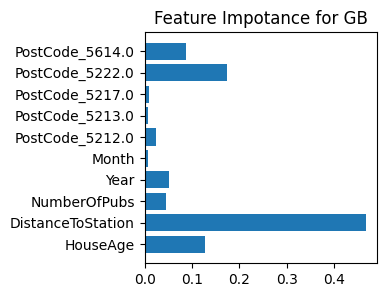

In [119]:
plt.figure(figsize=(3,3))
plt.title('Feature Impotance for GB')
plt.barh(ensemble.feature_names_in_,ensemble.feature_importances_)
plt.show()

#### Calculate Feature importance for other model 

In [120]:
import numpy as np

In [123]:
feature_importances = {}
for algo, pipeline in fit_models.items():
    if algo == 'ridge':
        coef_ = pipeline.best_estimator_['ridge'].coef_
        feature_importances[algo] = np.square(coef_)/np.sum(np.square(coef_))
    else:
       feature_importances[algo] = pipeline.best_estimator_[1].feature_importances_

In [124]:
feature_importances

{'ridge': array([1.64842453e-02, 1.01874497e-01, 3.10969377e-02, 3.86862977e-02,
        5.94596526e-06, 2.25704876e-01, 9.47271060e-02, 1.69412578e-02,
        3.92285970e-01, 8.21928660e-02]),
 'rf': array([0.13664832, 0.44572538, 0.0559606 , 0.05112701, 0.03439271,
        0.00873706, 0.00284868, 0.01217596, 0.16557021, 0.08681408]),
 'gb': array([0.12730843, 0.46730009, 0.04562837, 0.05169795, 0.00629157,
        0.023965  , 0.00641479, 0.00966219, 0.17486291, 0.0868687 ]),
 'xg': array([0.03207528, 0.07127062, 0.02292063, 0.05411822, 0.00475283,
        0.09275293, 0.02268689, 0.04478648, 0.41193107, 0.24270506],
       dtype=float32)}

In [125]:
importance_df = pd.DataFrame(feature_importances,index=ensemble.feature_names_in_)

In [126]:
importance_df

,ridge,rf,gb,xg
HouseAge,0.016484,0.136648,0.127308,0.032075
DistanceToStation,0.101874,0.445725,0.467300,0.071271
NumberOfPubs,0.031097,0.055961,0.045628,0.022921
Year,0.038686,0.051127,0.051698,0.054118
Month,0.000006,0.034393,0.006292,0.004753
PostCode_5212.0,0.225705,0.008737,0.023965,0.092753
PostCode_5213.0,0.094727,0.002849,0.006415,0.022687
PostCode_5217.0,0.016941,0.012176,0.009662,0.044786
PostCode_5222.0,0.392286,0.165570,0.174863,0.411931
PostCode_5614.0,0.082193,0.086814,0.086869,0.242705


#### Plot trees

In [128]:
from sklearn.tree import plot_tree
import xgboost as xgb
from matplotlib.pylab import rcParams

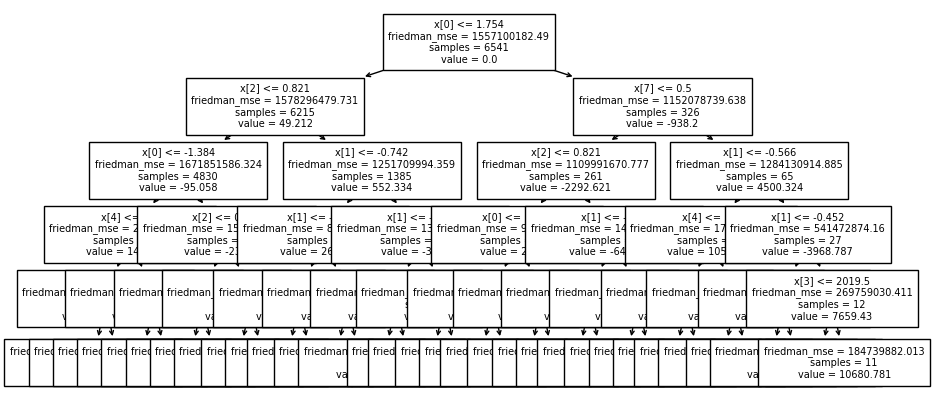

In [129]:
# Plot tree for gradient boosted model
plt.figure(figsize=(10,5))
plot_tree(ensemble.estimators_[299,0],fontsize = 7)
plt.show()

#### Save the Model

In [130]:
import dill

In [131]:
model = fit_models['gb']

In [132]:
with open('gb.pkl','wb') as f:
    dill.dump(model,f)